Model Accuracy: 1.0
Predicted class: setosa


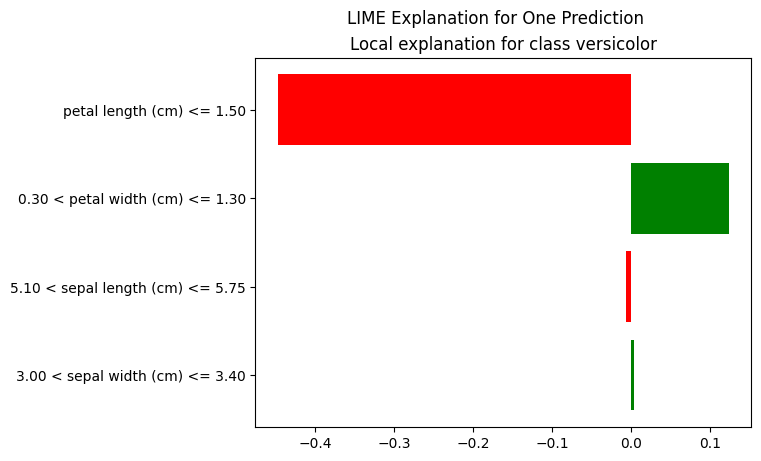

Feature contributions:
petal length (cm) <= 1.50: -0.4472
0.30 < petal width (cm) <= 1.30: 0.1241
5.10 < sepal length (cm) <= 5.75: -0.0065
3.00 < sepal width (cm) <= 3.40: 0.0042
SP-LIME Representative Samples:
Sample 1 Prediction: versicolor
  4.25 < petal length (cm) <= 5.10: 0.4826
  0.30 < petal width (cm) <= 1.30: 0.1546
  sepal width (cm) <= 2.80 : -0.0477
  5.75 < sepal length (cm) <= 6.40: 0.0082
Sample 2 Prediction: setosa
  1.50 < petal length (cm) <= 4.25: 0.3070
  petal width (cm) <= 0.30 : 0.1627
  5.10 < sepal length (cm) <= 5.75: -0.0052
  sepal width (cm) > 3.40  : 0.0009
Sample 3 Prediction: virginica
  petal length (cm) > 5.10 : -0.3628
  petal width (cm) > 1.80  : -0.3622
  sepal length (cm) > 6.40 : -0.0136
  sepal width (cm) <= 2.80 : -0.0034
Sample 4 Prediction: versicolor
  4.25 < petal length (cm) <= 5.10: 0.4548
  1.30 < petal width (cm) <= 1.80: 0.0319
  2.80 < sepal width (cm) <= 3.00: 0.0086
  5.75 < sepal length (cm) <= 6.40: -0.0080
Sample 5 Prediction: v

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

iris=load_iris()
X=iris.data
y=iris.target
feature_names=iris.feature_names
class_names=iris.target_names

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
print("Model Accuracy:",accuracy_score(y_test,model.predict(X_test)))

explainer=LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification'
)

sample_index=5
sample=X_test[sample_index]
pred_class=model.predict([sample])[0]

print("Predicted class:",class_names[pred_class])

exp=explainer.explain_instance(sample,model.predict_proba,num_features=4)
exp.as_pyplot_figure().suptitle("LIME Explanation for One Prediction")
plt.show()

print("Feature contributions:")
for feature,weight in exp.as_list():
    print(f"{feature:25s}: {weight:.4f}")

num_samples=5
print("SP-LIME Representative Samples:")
for i in range(num_samples):
    exp_i=explainer.explain_instance(X_test[i],model.predict_proba,num_features=4)
    print(f"Sample {i+1} Prediction: {class_names[model.predict([X_test[i]])[0]]}")
    for feature,weight in exp_i.as_list():
        print(f"  {feature:25s}: {weight:.4f}")